Pokémon Soup - Pulling data from webpages using Beautiful Soup

Written by Robison Saalfeld - 27/11/2021

The following code is presented in the article in medium: 

Basically, the idea is to check whether pokémon types and colors are correlated or not.

Import section:

In [743]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import urllib.request
from scipy.stats import chi2_contingency

Getting data for pokémon types:

In [744]:
# First, to get permission to acces the page you'll need to define the user agent. 
# To check what is the user agent for your brower, you can visit http://httpbin.org/get
# To check for information on what is user-agent, you may check here: 
# https://www.howtogeek.com/114937/htg-explains-whats-a-browser-user-agent/
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

# Then, we'll need to provide the url for the page we want to pull data from
url = "https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_index_number_(Generation_VII)"
headers={'User-Agent':user_agent,} 

# And make a request.
request=urllib.request.Request(url,None,headers) #The assembled request
response = urllib.request.urlopen(request)

# Then, this is a command to read the data
data = response.read() # The data u need

# And finally, soup it!
soup = BeautifulSoup(data, features="html.parser")

In [745]:
#Start a list to save the data
data = []
#For each element in our list of span tags
for tag in soup.find_all('span'):
    #The condition we are looking for: get argument style is not None 
    if tag.get('style') is not None:
        #Add the text inside the tag to the data
        data.append(tag.get_text())

In [750]:
print(data[:27])

['Bulbasaur', 'Grass', 'Poison', 'Ivysaur', 'Grass', 'Poison', 'Venusaur', 'Grass', 'Poison', 'Charmander', 'Fire', 'Fire', 'Charmeleon', 'Fire', 'Fire', 'Charizard', 'Fire', 'Flying', 'Squirtle', 'Water', 'Water', 'Wartortle', 'Water', 'Water', 'Blastoise', 'Water', 'Water']


In [751]:
#Let's reorganize the data into a dataframe with 3 columns
df = pd.DataFrame(np.array(data).reshape([int(len(data)/3),3]))
#And let's rename the columns and use the name as the index
df.columns = ['name','type1','type2']
df.index = df.name
df.drop(axis = 1,columns=['name'],inplace=True)

In [752]:
#Check for duplicated data
list(df[df.index.duplicated()].index)

['Wormadam',
 'Wormadam',
 'Rotom',
 'Rotom',
 'Rotom',
 'Rotom',
 'Rotom',
 'Shaymin',
 'Darmanitan',
 'Meloetta',
 'Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie',
 'Metapod',
 'Butterfree',
 'Weedle',
 'Kakuna',
 'Beedrill',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'Rattata',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandslash',
 'Nidoran♀',
 'Nidorina',
 'Nidoqueen',
 'Nidoran♂',
 'Nidorino',
 'Nidoking',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Jigglypuff',
 'Wigglytuff',
 'Zubat',
 'Golbat',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Paras',
 'Parasect',
 'Venonat',
 'Venomoth',
 'Diglett',
 'Dugtrio',
 'Meowth',
 'Persian',
 'Psyduck',
 'Golduck',
 'Mankey',
 'Primeape',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Abra',
 'Kadabra',
 'Alakazam',
 'Machop',
 'Machoke',
 'Machamp',
 'Bellsprout',
 'Weepinbell',
 'Vi

In [753]:
#Let's keep only the first entrance
df = df[~df.index.duplicated()]

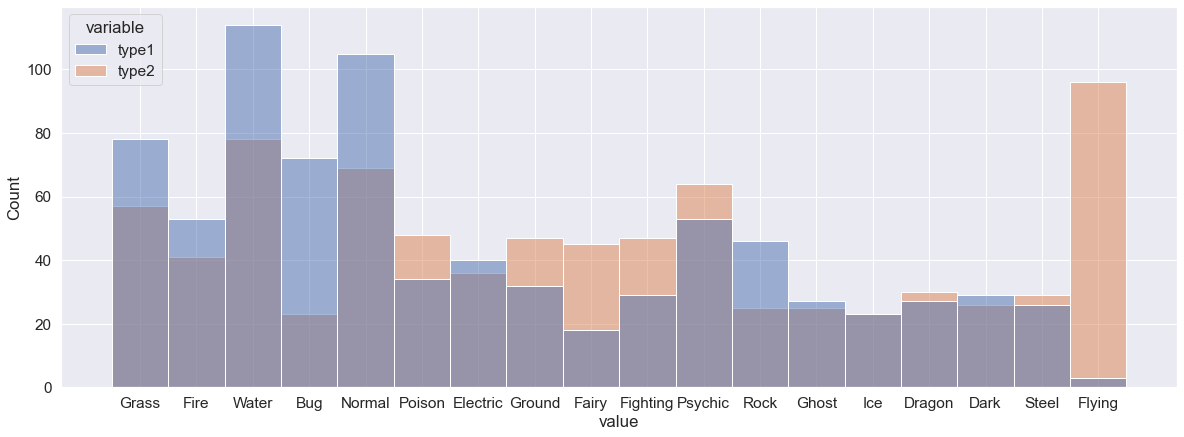

In [754]:
fig, ax = plt.subplots(figsize=(20,7))
ax = sns.histplot(data=df.melt(),x='value',hue='variable')

Getting data for pokémon colors.

In [755]:
#URL for pokémon color
url = "https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_color"

request=urllib.request.Request(url,None,headers) #The assembled request
response = urllib.request.urlopen(request)
data = response.read() # The data u need
soup = BeautifulSoup(data, features="html.parser")

In [756]:
# get text
text = soup.get_text()

In [757]:
for tag in soup.find_all('small'):
     tag.decompose()

# get text
text = soup.get_text()

In [758]:
text = text[text.find('\nList of Pokémon by color\n'):]
text = text[:text.find('Lists of Pokémon')]

In [759]:
#We will split our text
lista = list(text.split())
#Save names of pokémon that appear more than once
list_multi = [x for x in lista if lista.count(x) > 1]

In [760]:
#Create a vector for pokémon color
pk_color = ['Red','Blue','Yellow','Green','Black','Brown','Purple','Gray','White','Pink']
pokemon_colors = [lista[lista.index(pk_color[i])+1:lista.index(pk_color[i+1])] for i in range(len(pk_color)-1)]
pokemon_colors.append(lista[lista.index(pk_color[-1])+1:])

In [761]:
for i,color in enumerate(pokemon_colors):
    for pokename in color:
        df.loc[pokename,'color'] = pk_color[i]

In [762]:
df.dropna(axis=0,how='any',inplace=True)

In [763]:
for x in list_multi:
    if x in df.index:
        df.loc[x,'color']='Multi'

<AxesSubplot:xlabel='color', ylabel='Count'>

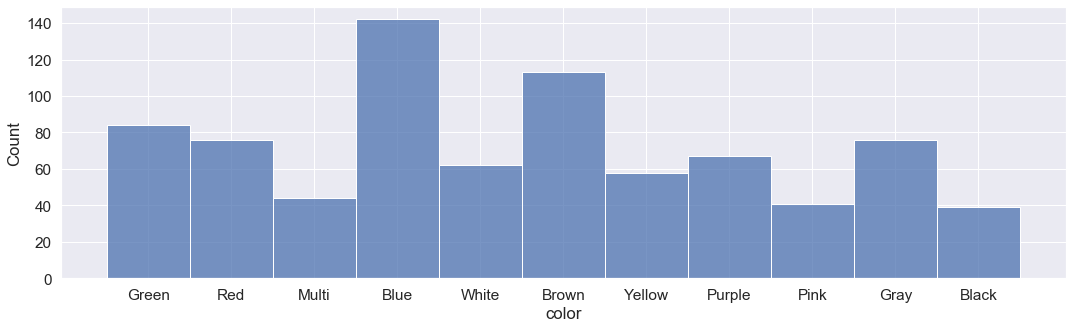

In [764]:
plt.subplots(figsize=(18,5))
sns.histplot(data=df,x='color')

Checking for correlation.

In [765]:
pd.crosstab(df.color, df.type1).style.background_gradient()

type1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
color,,,,,,,,,,,,,,,,,,
Black,2,9,1,3,0,0,0,0,9,0,1,0,6,3,3,0,1,1
Blue,5,5,8,6,1,4,0,0,0,5,1,8,7,7,9,9,4,63
Brown,3,2,1,0,0,7,11,0,6,9,12,3,37,2,4,9,3,4
Gray,9,4,4,4,0,6,0,0,1,2,6,2,10,0,1,11,12,4
Green,8,0,3,1,1,1,0,1,1,41,4,0,1,3,6,3,3,7
Multi,3,0,3,1,0,0,9,0,0,1,4,1,8,3,2,5,1,3
Pink,0,0,0,1,7,0,0,0,0,5,0,1,14,0,4,1,0,8
Purple,6,3,3,0,1,3,0,2,7,5,2,0,4,16,8,2,0,5
Red,17,4,1,3,0,2,28,0,0,1,2,2,4,0,1,2,0,9


In [766]:
chi2,p,dof,expected = chi2_contingency(pd.crosstab(df.color, df.type1))
print('the p value between color and type 1 is {}'.format(p))
chi2,p,dof,expected = chi2_contingency(pd.crosstab(df.color, df.type2))
print('the p value between color and type 2 is {}'.format(p))

the p value between color and type 1 is 1.389726899618579e-131
the p value between color and type 2 is 3.780151922730408e-93


In [344]:
# pd.DataFrame(expected).style.background_gradient(axis=1)